In [2]:
import matplotlib.pyplot as plt

In [3]:
from numpy.random import randint
from numpy.random import seed
inputdataset={}
seed(8)
r=1000
while(r<10000001):
    values = randint(1, 10001, r)
    inputdataset[r]=values
    r*=10

In [4]:
print(inputdataset)

{1000: array([4548, 9557, 2034, 2182, 6996, 5481, 2097, 4212,  459, 8813, 4366,
       6026, 9278, 6288, 5470, 3427, 7484, 8463, 6585, 8970, 4660, 5046,
       2876, 6315, 4507, 6467, 9958, 3454, 7250, 3948, 3856, 1501,  492,
       8768,  599, 7200, 2582, 2077,  736, 1419, 8001, 1401, 9434, 7772,
       5484, 1575, 5431, 5167, 3719, 3233, 1418, 2019, 4839, 6571, 4924,
       4401, 6257,  207,  119, 9144, 9912,  789, 3321, 7384, 1251, 5785,
       1437, 9862, 4931, 5388, 7389, 7625, 7642, 4776,  912, 1172, 6715,
        382, 3628, 8221, 7780, 5265, 1186, 6847, 9736, 4948, 2858, 1966,
       3223, 2765, 7510,  562, 5790,  798, 3496, 1305, 7010, 4897, 3536,
       8150, 8835, 6088, 9224, 9416, 2059, 5745, 4900, 3344, 8117, 3922,
       3399, 2868, 2452, 8445, 9541, 4855, 2857, 6592, 1146, 5238,  124,
       6705, 6507, 9830, 4475, 1310, 8139, 8367, 4058, 7175, 3066, 2227,
       6103, 4892,  978, 3922, 5578, 2269, 2529, 9955, 8985, 7617, 9426,
       6139, 6580, 7720, 9805, 6742, 4514,  

In [5]:
# insertion sort for hybrid algorithm written later
"""
parameters of this function are original array, start index and end index. The start index and end index are indices of 
elements in original array that demarcate the portion of the array to be handled by insertion sort algorithm. After a run 
of this function on the demarcated part of the array, that part of the array is sorted in ascending order while leaving 
the rest of the array untouched.
"""
def insertionsort2(arr,start,end):
    n=end-start+1;
    kc=0
    for h in range(1,n):
        for i in range(h,0,-1):
            kc+=1
            if(arr[start+i]<arr[start+i-1]):
                temp=arr[start+i-1]
                arr[start+i-1]=arr[start+i]
                arr[start+i]=temp
            else:
                break
    return kc

def insertionsort2(arr,start,end):
    n=end-start+1;
#### here n is size of array portion to be handled by insertion sort (demarcated by start and end indices)
    kc=0
#### setting initial number of key comparisons to 0
    for h in range(1,n):
#### outer loop runs from 1 till n-1 (indices) as in insertion sort, each element- starting from second element (index 1) till last element (index n-1) is sequentially inserted into sorted array to its left.
        for i in range(h,0,-1):
#### inner loop runs from value of h in outer loop till 1 (unless it gets broken when the element being placed has already reached its correct position in the sorted array to its left and thus, no further swaps are needed). The inner loop runs completely only when the element being placed is lesser than all the elements to its left.
            kc+=1
#### entering this inner loop means one comparison- (arr[start+i]<arr[start+i-1]) will definitely be executed. So kc is increased by 1
            if(arr[start+i]<arr[start+i-1]):
#### if the element being placed (arr[start+i]) is lesser than the element right before it, then these two elements are swapped
                temp=arr[start+i-1]
                arr[start+i-1]=arr[start+i]
                arr[start+i]=temp
            else:
#### if the element being placed (arr[start+i]) is greater than or equal to the element right before it, then that means the element being placed has already reached its correct position in the sorted array on its left and no more comparisons/swaps are required. So inner loop is broken and we can move on to the next element to be placed.
                break
#### The function returns the total number of key comparisons conducted
    return kc

In [6]:
# merge function for hybrid algorithm written later
"""
The merger function merges two sorted arrays into a single sorted array. It uses a temporary array as auxiliary 
storage. The parameters passed are arr- the original array, start index, mid index and end index. Here start is the
index of the element marking the beginning of the first subarray (in the original array). Mid is the index of the element
marking the beginning of the second subarray. End index marks the end of the second subarray.
"""
def merger2(arr, start, mid, end) :
    temp = [0] * (end-start+1)
    x=start
    y=mid
    z=0
    kc=0
    while(x<mid and y<end+1) :
        kc+=1
        if(arr[x]<arr[y]) :
            temp[z]=arr[x]
            x+=1
            z+=1
        elif(arr[x]==arr[y]):
            kc+=1
            temp[z]=arr[x]
            x+=1
            z+=1
            temp[z]=arr[y]
            z+=1
            y+=1
        else :
            kc+=1
            temp[z]=arr[y]
            z+=1
            y+=1
    while(x<mid) :
        temp[z]=arr[x]
        x+=1
        z+=1
    while(y<end+1) :
        temp[z]=arr[y]
        y+=1
        z+=1
    for k in range (0,len(temp)):
        arr[start+k]=temp[k]
    return kc

def merger2(arr, start, mid, end) :
    temp = [0] * (end-start+1)
#### temp is the temporary array which serves as auxiliary storage for storing the final merged array.
    x=start
#### element at index start in original array is first element of subarray 1. x is current element of subarray 1 which is to be compared. So x is intialised as start (first element of subarray 1)
    y=mid
#### element at index mid in original array is first element of subarray 2. y is current element of subarray 2 which is to be compared. So y is intialised as mid (first element of subarray 2)
    z=0
#### z is next empty index of temp array. It is initialised as 0.
    kc=0
#### setting initial number of key comparisons to 0
    while(x<mid and y<end+1) :
#### the merging will continue until either of the two arrays run out of elements,i.e x becomes equal to mid or y exceeds end
        kc+=1
#### entering this while loop guarantees atleast one key comparison,i.e arr[x]<arr[y], so kc is increased by 1
        if(arr[x]<arr[y]) :
#### if first array's current element is smaller than second array's current element, then that smaller element is placed in the current empty index (z) of temp array and z and x are both shifted by 1 place to the right in their respective arrays.
            temp[z]=arr[x]
            x+=1
            z+=1
        elif(arr[x]==arr[y]):
#### if first array's current element is equal to second array's current element, then both the equal elements are put into the temp array together and z is shifted by 2 places to the right. Both x and y are also shifted by 1 place to the right. arr[x]==arr[y] is another key comparison that is executed. So kc is raised by 1.
            kc+=1
            temp[z]=arr[x]
            x+=1
            z+=1
            temp[z]=arr[y]
            z+=1
            y+=1
        else :
#### if first array's current element is greater than second array's current element, then the smaller element is placed in the current empty index (z) of temp array and z and y are both shifted by 1 place to the right in their respective arrays. As the previous else if had a kc (albeit false), kc is raised by 1.
            kc+=1
            temp[z]=arr[y]
            z+=1
            y+=1
#### if one of the 2 subarrays isn't completely over, then one of the following two while blocks get executed to append the remanining subarray into the temp array.
    while(x<mid) :
#### if first subarray is not over
        temp[z]=arr[x]
        x+=1
        z+=1
    while(y<end+1) :
#### if second subarray is not over
        temp[z]=arr[y]
        y+=1
        z+=1
#### The temp array (which is the final merged and sorted array) is copied back into the portion of the original array between start and end indices
    for k in range (0,len(temp)):
        arr[start+k]=temp[k]
#### The function returns the total number of key comparisons conducted 
    return kc

In [7]:
# hybrid merge-insertion sort recursive algorithm
"""
Parameters passed are-:
S- If the size of a subarray is lesser than or equal to this threshold size, then that subarray will be sorted by insertion sort algorithm. Only subarrays bigger than size S will be handled by mergesort
arr- original input array
start- index of element marking the beginning of subarray
end- index of element marking the end of subarray
"""
def mergeinsertionsort(S,arr,start,end):
    kc=0
#   if end-start+1==1 and S!=1:
#       return kc
    if end-start+1<=S:
        kc+=insertionsort2(arr,start,end)
        
    else:
        mid=1+start+int((end-start)/2)
        kc+=mergeinsertionsort(S,arr,start,mid-1)
        kc+=mergeinsertionsort(S,arr,mid,end)
        kc+=merger2(arr,start,mid,end)
    return kc

def mergeinsertionsort(S,arr,start,end):
    kc=0
#### setting initial number of key comparisons to 0   
    if end-start+1<=S:
#### this if block does the switch to insertion sort if size of subarray (end-start+1) becomes equal or lesser than threshold S
        kc+=insertionsort2(arr,start,end)
  
    else:
#### for subarrays longer than S, the usual mergesort carries on
        mid=1+start+int((end-start)/2)
#### the array is partitioned into two almost equal sized subarrays (start to mid-1) and (mid to end). Mergesort is called on these two subarrays recursively and the sorted subarrays are then combined into a merged and sorted array using the merger2 function.
        kc+=mergeinsertionsort(S,arr,start,mid-1)
        kc+=mergeinsertionsort(S,arr,mid,end)
        kc+=merger2(arr,start,mid,end)
#### Total number of key comparisons are returned.
    return kc
#### One important point to note in our implementation of hybrid sort is that all base cases of array size=1 are handled by the insertion sort function block as for an array of one element, it is irrelevant whether it is handled by insertion sort or merge sort. No comparisons are done either way and the element is simply returned by both. So for our algorithm, the minimum valid value of S is 1 and not 0. Putting S as 0 will result in a "maximum recursion depth exceeded in comparison" error. The extreme case of never using insertion sort at all is represented by S=1 only and S=0 is not needed. This is because if S=1, a 1-sized array will never enter the outer for loop of insertion sort and thus, in a way insertion sort is never really executed. The single element is simply returned unchanged. 

#### We have a commented out if block which if added at the start of this function, will also make S=0 valid.
#### if end-start+1==1 and S!=1:
####        return kc
#### But our team thinks it is not useful to check this if condition (whether array size=1 and S is not 1) everytime mergesort is called as base case of array size=1 is handled by both insertionsort and mergesort equivalently.

## Theoretical Analysis of Hybrid Algorithm
#### Time Complexity of hybrid algorithm= Time complexity of insertion sort + Time complexity of merge sort
#### Let S= subarray size threshold
####        n= original array size
Therefore, level at which insertion sort takes over from merge sort (for sorting subarrays) is when subarray size=S. So we divide the original array into n/S subarrays at level log(n/S) (log base 2)
Recursion Tree-: (insert diagram)
Complexity Of Merge Sort:
    Total number of key comparisons done by merge sort in copying 𝑛 elements from each level to upper level is 𝑂(𝑛)
    Number of levels = log(n/S)
    Complexity of Merge sort : O(n(log(n/S)))
    Time complexity of mergesort is the same in all cases- best,average and worst.
Complexity Of Insertion Sort
    We are sorting n/S subarrays each of S elements using insertion sort so number of comparisons contributed by.         insertion sort is (n/S)/n(number of comparisons in insertion sort of S elements)
Therefore,
    Total time complexity= O(n(log(n/S)) + (n/S)(number of comparisons in insertion sort of S elements))

### Best-case Time Complexity
This happens when Insertion sort performs in best case with O(n) i.e number of comparisons in insertion sort of S elements= S-1. Example of such a best case is when the array is completely sorted or nearly sorted.
So, Best Case Complexity= Total Complexity = O(n+nlog(n/S))

### Worst-case Time Complexity
This happens when Insertion sort perform in worst case with O(n^2) i.e number of comparisons in insertion sort of S elements= S^2. Example of such a worst case is when the array is completely sorted in the reverse order.
Worst Case Complexity=Total Complexity = O(nS+nlog(n/S))

### Average-case Time Complexity
Using the squeeze theorem of calculus, we can conclude that the average case time complexity will be O(nlogn) (as in both best case and worst case time complexities, the n (linear) term can be ignored in comparison to nlogn term as n logn term is way bigger than n term when n tends to infinity). As the average case function will be something lying in between the worst and best case functions and both worst and best case functions have the same limit (nlogn) when n tends to infinity, the average case function will also have the same nlogn limit.

In [114]:
S=10
TC={}
for size,inputlist in inputdataset.items():
  TC[size]=mergeinsertionsort(S,inputlist,0,len(inputlist)-1)
print(TC)

{1000: 9153, 10000: 126968, 100000: 1557950, 1000000: 19074895, 10000000: 226420062}


In [141]:
import math
keylist=[]
for i in list(TC.keys()):
    keylist.append(math.log10(i))
valuelist=[]
for i in list(TC.values()):
    valuelist.append(i/1000)

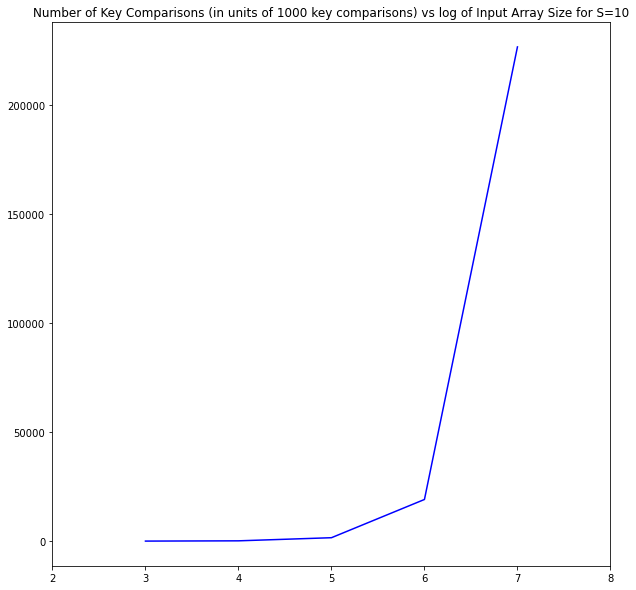

In [145]:
import numpy as np
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title('Number of Key Comparisons (in units of 1000 key comparisons) vs log of Input Array Size for S=10')
ax.plot(keylist,valuelist, color='blue')
plt.xlim(2, 8)
plt.show()

In [160]:
from numpy.random import randint
from numpy.random import seed
inputdataset={}
seed(8)
r=1000
while(r<10000001):
    values = randint(1, 10001, r)
    inputdataset[r]=values
    r*=10

In [175]:
import copy
TC2a={}
for s in [1,10,20,30,40,50,60,70,80,90,100]:
    seed(8)
    values = randint(1, 10001, 100000)
    TC2a[s]=mergeinsertionsort(s,values,0,100000-1)
print(TC2a)

{1: 1536276, 10: 1557912, 20: 1639518, 30: 1861670, 40: 1861670, 50: 2383841, 60: 2383841, 70: 2383841, 80: 2383841, 90: 2383841, 100: 3502870}


In [176]:
valuelist2=[]
for i in list(TC2a.values()):
    valuelist2.append(i/1000)

In [177]:
print(valuelist2)
print(list(TC2a.keys()))

[1536.276, 1557.912, 1639.518, 1861.67, 1861.67, 2383.841, 2383.841, 2383.841, 2383.841, 2383.841, 3502.87]
[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


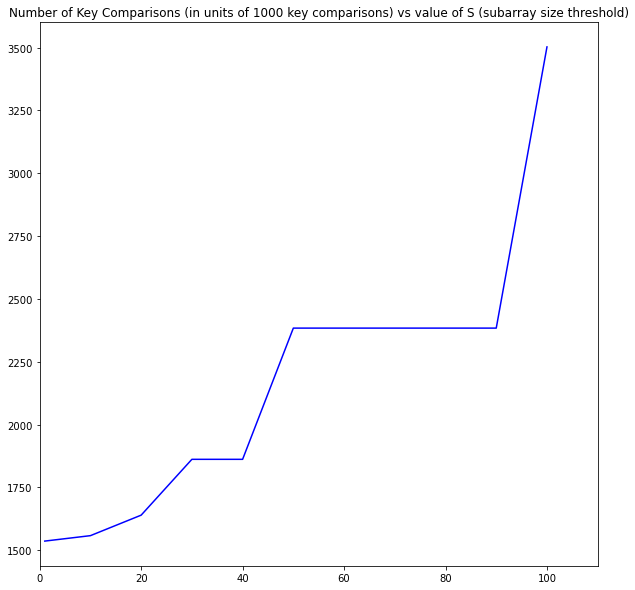

In [178]:
import numpy as np
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title('Number of Key Comparisons (in units of 1000 key comparisons) vs value of S (subarray size threshold)')
ax.plot(list(TC2a.keys()),valuelist2, color='blue')
plt.xlim(0, 110)
plt.show()

In [180]:
seed(8)
values = randint(1, 10001, 1000)
print(mergeinsertionsort(1000,values,0,1000-1))

254732


In [8]:
optimalanalysis={}
for svalue in [3,5,7,10,15,20,25,30,35,40]:
    kcvalue=0
    for sizevalue in [1000,10000,100000,1000000,10000000]:
        seed(8)
        values = randint(1, 10001, sizevalue)
        kcvalue+=mergeinsertionsort(svalue,values,0,sizevalue-1)
    kcvalue/=5
    optimalanalysis[svalue]=kcvalue

In [9]:
valuelist3=[]
for i in list(optimalanalysis.values()):
    valuelist3.append(i/1000)
print(valuelist3)

[48089.2448, 48302.222, 48325.3166, 49438.0366, 49617.2294, 52868.780399999996, 52913.21079999999, 53188.1076, 53505.5944, 61295.737]


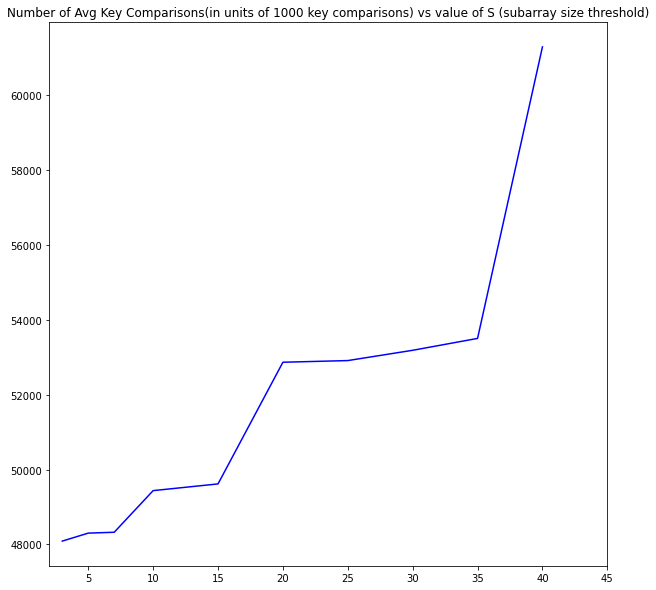

In [12]:
import numpy as np
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title('Number of Avg Key Comparisons(in units of 1000 key comparisons) vs value of S (subarray size threshold)')
ax.plot(list(optimalanalysis.keys()),valuelist3, color='blue')
plt.xlim(2, 45)
plt.show()

In [13]:
def mergesort(arr,start,end) :
  kc=0
  if start==end:
    return kc
  mid=1+start+int((end-start)/2)
  kc+=mergesort(arr,start,mid-1)
  kc+=mergesort(arr,mid,end);
  kc+=merger(arr,start,mid,end)
  return kc

def merger(arr, start, mid, end) :
    temp = [0] * (end-start+1)
    x=start
    y=mid
    z=0
    kc=0
    while(x<mid and y<end+1) :
        kc+=1
        if(arr[x]<arr[y]) :
            temp[z]=arr[x]
            x+=1
            z+=1
        elif(arr[x]==arr[y]):
            kc+=1
            temp[z]=arr[x]
            x+=1
            z+=1
            temp[z]=arr[y]
            z+=1
            y+=1
        else :
            kc+=1
            temp[z]=arr[y]
            z+=1
            y+=1
    while(x<mid) :
        temp[z]=arr[x]
        x+=1
        z+=1
    while(y<end+1) :
        temp[z]=arr[y]
        y+=1
        z+=1
    for k in range (0,len(temp)):
        arr[start+k]=temp[k]
    return kc

In [14]:
import time
seed(8)
values = randint(1, 10001, 10000000)
st1 = time.process_time()
kcmergesort=mergesort(values,0,len(values)-1)
et1 = time.process_time()
seed(8)
values = randint(1, 10001, 10000000)
st2 = time.process_time()
kchybridsort=mergeinsertionsort(10,values,0,len(values)-1)
et2 = time.process_time()

In [15]:
print("number of key comparisons in merge sort- ",kcmergesort)
print("Cpu execution time: ",et1-st1)
print("number of key comparisons in hybrid merge-insertion sort- ",kchybridsort)
print("Cpu execution time: ",et2-st2)
print("difference- ",kcmergesort-kchybridsort)

number of key comparisons in merge sort-  220105837
Cpu execution time:  212.51719999999978
number of key comparisons in hybrid merge-insertion sort-  226421603
Cpu execution time:  203.12671199999977
difference-  -6315766


In [16]:
import time
seed(8)
values = randint(1, 10001, 10000000)
st1 = time.process_time()
kcmergesort=mergesort(values,0,len(values)-1)
et1 = time.process_time()
seed(8)
values = randint(1, 10001, 10000000)
st2 = time.process_time()
kchybridsort=mergeinsertionsort(7,values,0,len(values)-1)
et2 = time.process_time()

In [17]:
print("number of key comparisons in merge sort- ",kcmergesort)
print("Cpu execution time: ",et1-st1)
print("number of key comparisons in hybrid merge-insertion sort- ",kchybridsort)
print("Cpu execution time: ",et2-st2)
print("difference- ",kcmergesort-kchybridsort)

number of key comparisons in merge sort-  220105837
Cpu execution time:  212.6772579999997
number of key comparisons in hybrid merge-insertion sort-  221116032
Cpu execution time:  199.83577700000023
difference-  -1010195


In [18]:
import time
seed(8)
values = randint(1, 10001, 10000000)
st1 = time.process_time()
kcmergesort=mergesort(values,0,len(values)-1)
et1 = time.process_time()
seed(8)
values = randint(1, 10001, 10000000)
st2 = time.process_time()
kchybridsort=mergeinsertionsort(3,values,0,len(values)-1)
et2 = time.process_time()

In [19]:
print("number of key comparisons in merge sort- ",kcmergesort)
print("Cpu execution time: ",et1-st1)
print("number of key comparisons in hybrid merge-insertion sort- ",kchybridsort)
print("Cpu execution time: ",et2-st2)
print("difference- ",kcmergesort-kchybridsort)

number of key comparisons in merge sort-  220105837
Cpu execution time:  211.931642
number of key comparisons in hybrid merge-insertion sort-  220106239
Cpu execution time:  204.28884599999992
difference-  -402
